In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
x=2 * np.random.rand(100,1)
y=4 + 3*x + np.random.randn(100,1)

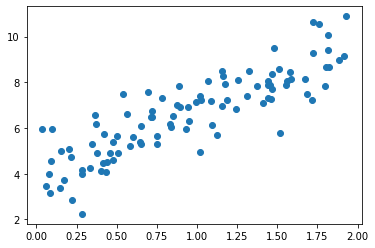

In [35]:
plt.scatter(x,y)

In [36]:
x_b = np.c_[np.ones((100,1)),x]
theta_best=np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [37]:
theta_best

array([[3.94080235],
       [2.83189154]])

# Prediction with manually calculation

In [38]:
# Prediction
x_new = np.array([[0],[2]])
x_new_b = np.c_[np.ones((2,1)),x_new]
y_predict = x_new_b.dot(theta_best)

In [39]:
y_predict

array([[3.94080235],
       [9.60458544]])

(0.0, 2.0, 0.0, 15.0)

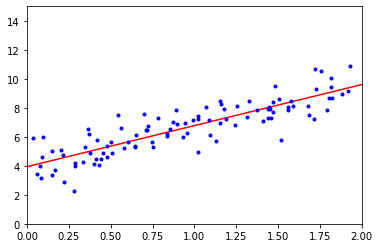

In [40]:
plt.plot(x_new,y_predict,'r-')
plt.plot(x,y,'b.')
plt.axis([0,2,0,15])

# Linear Regression algorithm

In [41]:
# Algorithm
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)


LinearRegression()

In [42]:
# intercept and coeffiecent
lin_reg.intercept_,lin_reg.coef_

(array([3.94080235]), array([[2.83189154]]))

In [43]:
theta_best_svd, residual,rank, s=np.linalg.lstsq(x_b,y,rcond=1e-6)

In [44]:
theta_best_svd

array([[3.94080235],
       [2.83189154]])

In [45]:
np.linalg.pinv(x_b).dot(y)


array([[3.94080235],
       [2.83189154]])

# Batch Gradient Descent

In [46]:
# Gradient descent step  # batch gradient descent
eta = 0.1 # learning rate
n_iteration = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iteration):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta)-y)
    theta = theta - eta* gradients
    

In [47]:
theta

array([[3.94080235],
       [2.83189154]])

# Stochestic Gradient Descent

In [48]:
# implements  stochestic Gradient
n_epochs = 50
t0 ,t1 = 5, 50

def learning_schedule(t):
     return t0/(t + t1)

theta = np.random.randn(2,1) #random intitialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch *m + i)
        theta = theta - eta * gradients

In [49]:
theta

array([[3.94453712],
       [2.84442295]])

In [50]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None,eta0=0.1)
sgd_reg.fit(x,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [51]:
sgd_reg.intercept_,sgd_reg.coef_

(array([3.95205428]), array([2.87222185]))

# Mini batch gradient descent


# Polynomial Regression

In [53]:
# Polynomial Regression
m = 100
x = 6* np.random.rand(m,1) - 1
y = 0.5 * x**2 + 2 + np.random.randn(m,1)

Text(0, 0.5, 'y')

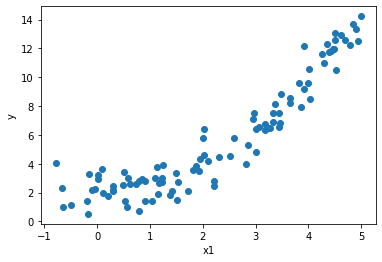

In [54]:
plt.scatter(x,y)
plt.xlabel('x1')
plt.ylabel('y')

In [55]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature =  PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_feature.fit_transform(x)
x[0]

array([0.91523545])

In [56]:
x_poly[0]

array([0.91523545, 0.83765592])

In [57]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
lin_reg.intercept_,lin_reg.coef_

(array([2.12609735]), array([[-0.19691111,  0.52412251]]))

In [58]:
y_pred = lin_reg.predict(x_poly)
y_pred

array([[ 2.38491164],
       [ 6.81221104],
       [13.1985274 ],
       [ 3.59918795],
       [ 2.11031569],
       [ 2.1143969 ],
       [ 2.54310216],
       [ 2.18385994],
       [ 2.46732869],
       [ 2.86016942],
       [ 8.36796713],
       [11.90279563],
       [ 3.03867265],
       [ 2.34880739],
       [ 9.36680732],
       [ 3.86832739],
       [ 9.02196754],
       [ 5.12265629],
       [ 7.11257888],
       [ 2.20651437],
       [ 2.15997217],
       [ 6.26944376],
       [ 2.16730483],
       [ 7.78725342],
       [ 2.7003987 ],
       [ 5.86156732],
       [ 4.4659642 ],
       [12.76424354],
       [ 2.1753651 ],
       [14.17308594],
       [11.54435772],
       [ 2.18062452],
       [ 7.28650867],
       [ 2.48226181],
       [ 6.13300772],
       [ 7.65917248],
       [ 3.01060354],
       [ 2.26399566],
       [ 3.34605983],
       [ 2.57267019],
       [ 6.1464074 ],
       [ 6.98313478],
       [11.87095773],
       [ 9.1992448 ],
       [ 3.05808126],
       [ 2

In [59]:
x1=poly_feature

In [60]:
plt.plot(kind='line',x,y_pred)
plt.xlabel('x1')
plt.ylabel('y')

SyntaxError: positional argument follows keyword argument (Temp/ipykernel_14816/1179535063.py, line 1)

In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,x,y):
    x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2,random_state=42)
    train_errors , val_errors = [],[]
    for m in range(1,len(x_train)):
        model.fit(x_train[:m], y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors),'r-+', linewidth =2, label='train')
    plt.plot(np.sqrt(val_errors),'b-', linewidth=3, label='val')
    plt.legend()
    plt.xlabel('Training Lit size')
    plt.ylabel('RMSE')
    plt.show()


### Linear Regression learning curve

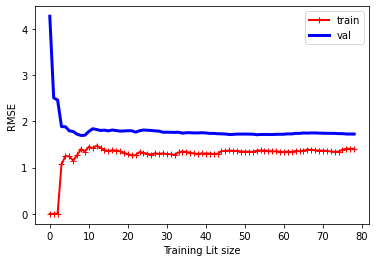

In [62]:
lin_reg= LinearRegression()
plot_learning_curves(lin_reg,x,y)

#### Polynomial regression curve

In [63]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ('poly_features',PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg',LinearRegression())
])

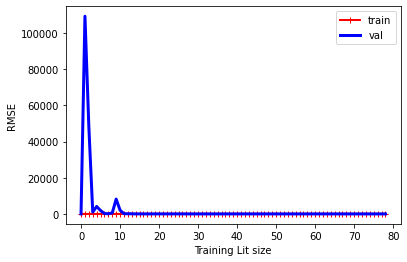

In [64]:
plot_learning_curves(polynomial_regression,x,y)

# Ridge Regression (L2 norm)

In [65]:
# Ridge Regression  l2 norm
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(x,y)

Ridge(alpha=1, solver='cholesky')

In [66]:
ridge_reg.predict([[1.5]])

array([[4.1717726]])

In [67]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(x,y.ravel())
sgd_reg.predict([[1.5]])

array([4.11474281])

# Lasso Regression (L1 norm)

In [68]:
#3 Lasso regression  l1 norm
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x,y)
lasso_reg.predict([[1.5]])


array([4.1926448])

In [69]:
from sklearn.linear_model import SGDRegressor,ElasticNet
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(x,y)
elastic_net.predict([[1.5]])


array([4.20703077])

In [72]:
# Basic Implementation of early stopping
# prepare the data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2,random_state=42)

poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])

x_train_poly_scaled = poly_scaler.fit_transform(x_train)
x_val_poly_scaled = poly_scaler.transform(x_val)

In [86]:
from sklearn.base import clone
sgd_reg = SGDRegressor(max_iter=1,tol=-np.infty, warm_start=True, penalty=None, 
                                    learning_rate='constant',eta0=0.0005)

minimum_val_error = float('inf')
best_epoch =None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(x_train_poly_scaled,y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(x_val_poly_scaled)
    val_error = mean_squared_error(y_val,y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

In [88]:
print(best_epoch)
print(best_model)

987
SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             tol=-inf, warm_start=True)


# Logistic Regression

In [90]:
# Logistic Regression
## training cost function
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [95]:
x= iris['data'][:,3:] # select only one feature

y =(iris['target'] ==2).astype(int) # 1 if iris_virginica else 0

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x,y)


LogisticRegression()

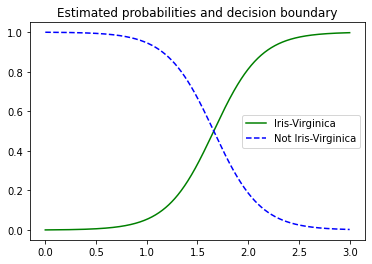

In [104]:
x_new = np.linspace(0,3, 1000).reshape(-1,1)  # reshape in one column
y_prob = log_reg.predict_proba(x_new)
plt.plot(x_new, y_prob[:,1],'g-',label = 'Iris-Virginica')
plt.plot(x_new,y_prob[:,0],'b--',label='Not Iris-Virginica')
plt.title('Estimated probabilities and decision boundary')
plt.legend()


In [110]:
log_reg.predict([[1.6],[2.6]])

array([0, 1])

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

# Softmax Regression
it is multiclass ,not multioutput so it is used to mutually exclusive classes

In [115]:
x = iris['data'][:,(2,3)]  # petal length, petal width
y = iris['target']

In [116]:
# softmax regression
softmax_reg = LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)
softmax_reg.fit(x,y)

LogisticRegression(C=10, multi_class='multinomial')

In [117]:
softmax_reg.predict([[5,2]])

array([2])

In [118]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

<center>****End****